In [1]:
import torch
import numpy as np
import cloudpickle as pickle
import os
from tqdm.auto import tqdm
import seaborn as sns
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"

In [2]:
ck = '/home/sergei/ray_results/ve5_vf_poc/main_fcn_ff884_00000_0_2020-12-07_01-41-52/checkpoint_10000/checkpoint'

In [3]:
learner = pickle.load(open(ck, 'rb'))

Make environment VectorIncrement-v0 None {}
Using device cpu


In [4]:
#for i in tqdm(range(1000)):
#    _ = learner._epoch()

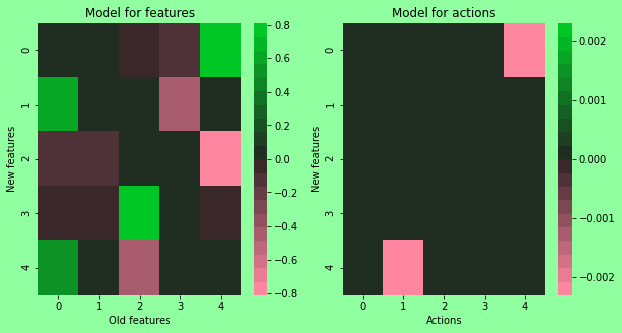

In [5]:
_ = learner.visualize_model()

In [15]:
learner.collect_steps()

In [16]:
ctx = learner._context

In [34]:
mse(learner.decoder(ctx['obs_x']), learner.decoder(ctx['obs_y']))

tensor(1.9441e-08, grad_fn=<MeanBackward0>)

In [10]:
# obtaining data
learner = pickle.load(open(ck, 'rb'))
mse = torch.nn.MSELoss()

Make environment VectorIncrement-v0 None {}
Using device cpu


In [11]:
opt = torch.optim.Adam(learner.model.parameters(), lr=1e-2)

In [312]:
learner.collect_steps()

In [315]:
c = learner._context


for _ in tqdm(range(1000)):
#     learner.collect_steps()
    opt.zero_grad()
    loss = learner.config.get('losses')['fit']['fcn'](**c) ** 2
#     loss = mse(learner.model(c['obs_x'], c['action_x']), c['obs_y'])
#     loss = mse(learner.model(learner.decoder(c['obs_x']), c['action_x']), learner.decoder(c['obs_y']))
    loss.backward()
    opt.step()
loss ** 0.5

tensor(2.8061e-07, grad_fn=<PowBackward0>)

In [296]:
learner.collect_steps()
c = learner._context
print(mse(learner.model(c['obs_x'], c['action_x']), c['obs_y']) ** 0.5)
print(learner.config.get('losses')['fit']['fcn'](**c))

tensor(2.6059e-07, grad_fn=<PowBackward0>)
tensor(2.6059e-07, grad_fn=<PowBackward0>)


In [50]:
Do = torch.tensor(torch.randn(1000, 10), requires_grad=True)

/home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [54]:
torch.pinverse(Do.T @ Do) @ (Do).T @ Do

tensor([[ 1.0000e+00, -3.4925e-08, -1.6438e-07,  2.9634e-07, -3.8184e-08,
          4.8429e-08, -3.2596e-09, -8.4867e-08,  1.4121e-07,  1.2713e-07],
        [-1.1711e-07,  1.0000e+00, -2.7474e-08, -6.5658e-08, -7.5437e-08,
          1.9558e-07, -4.9360e-08,  1.1548e-07, -8.3703e-08, -1.8720e-07],
        [ 3.5390e-08, -5.3085e-08,  1.0000e+00, -5.3085e-08,  8.9873e-08,
          8.7311e-08,  4.8894e-09,  7.6485e-08, -5.2154e-08,  1.4529e-07],
        [ 2.6030e-07,  5.3551e-08, -1.5274e-07,  1.0000e+00, -7.8231e-08,
         -1.3411e-07, -2.5472e-07, -1.4901e-07,  9.3132e-09,  1.5879e-07],
        [-9.7789e-08,  8.8476e-08,  6.2399e-08,  2.4214e-08,  1.0000e+00,
         -1.3039e-08,  2.4633e-07,  5.5414e-08, -1.4855e-07,  1.5087e-07],
        [-4.1910e-08,  5.9139e-08,  5.0990e-08,  3.0361e-07,  9.5926e-08,
          1.0000e+00,  1.5832e-08, -3.7253e-09, -4.7730e-09, -4.1269e-08],
        [ 2.5146e-08,  1.4435e-07,  5.7538e-08, -1.1642e-07,  1.3900e-07,
         -1.7695e-07,  1.0000e+0

In [35]:
learner.model

LinearModel(
  (fc_features): Linear(in_features=5, out_features=5, bias=False)
  (fc_action): Linear(in_features=5, out_features=5, bias=False)
)

In [274]:
learner.config.get('losses')['fit']['fcn']

<function sparse_causal_model_learner_rl.loss.losses.fit_loss(obs_x, obs_y, action_x, decoder, model, **kwargs)>

In [217]:
cx = c['obs_x'] / 0.2
cy = c['obs_y'] / 0.2
ax = c['action_x']

In [8]:
torch.max(torch.abs(cx + ax - cy))

RuntimeError: operation does not have an identity.

In [49]:
learner.model.load_state_dict(dict(learner.model.state_dict()))

<All keys matched successfully>

In [67]:
learner.model.load_state_dict({'fc_features.weight': torch.eye(5), 'fc_action.weight': torch.eye(5) * 0.2})

<All keys matched successfully>

tensor(1.8545e-08, grad_fn=<PowBackward0>)

In [316]:
learner.model.state_dict()

OrderedDict([('fc_features.weight',
              tensor([[ 1.0000e+00, -3.7326e-09, -4.1756e-09, -5.3866e-09, -1.4141e-08],
                      [ 1.3583e-07,  1.0000e+00,  3.6559e-07,  2.5611e-07,  2.7303e-07],
                      [ 2.9464e-07,  1.9827e-07,  1.0000e+00,  1.0768e-07,  6.8592e-08],
                      [ 2.0703e-07,  1.5340e-07,  8.6079e-08,  1.0000e+00,  3.2113e-07],
                      [-2.0347e-09,  7.7265e-09,  7.9805e-09,  1.7971e-08,  1.0000e+00]])),
             ('fc_action.weight',
              tensor([[ 2.0000e-01, -8.0575e-09,  5.1624e-09,  5.1784e-09,  3.6488e-09],
                      [ 9.0417e-08,  2.0000e-01,  1.7785e-07,  1.5113e-07,  1.1244e-07],
                      [ 1.5305e-07,  1.1921e-07,  2.0000e-01,  1.0467e-07,  1.3423e-07],
                      [ 1.7660e-07,  1.7317e-07,  1.7141e-07,  2.0000e-01,  1.7802e-07],
                      [ 9.0525e-09,  7.7374e-09,  9.5596e-09,  1.2344e-08,  2.0000e-01]]))])

In [322]:
list(learner.model.parameters())

[Parameter containing:
 tensor([[ 1.0000e+00, -3.7326e-09, -4.1756e-09, -5.3866e-09, -1.4141e-08],
         [ 1.3583e-07,  1.0000e+00,  3.6559e-07,  2.5611e-07,  2.7303e-07],
         [ 2.9464e-07,  1.9827e-07,  1.0000e+00,  1.0768e-07,  6.8592e-08],
         [ 2.0703e-07,  1.5340e-07,  8.6079e-08,  1.0000e+00,  3.2113e-07],
         [-2.0347e-09,  7.7265e-09,  7.9805e-09,  1.7971e-08,  1.0000e+00]],
        requires_grad=True),
 Parameter containing:
 tensor([[ 2.0000e-01, -8.0575e-09,  5.1624e-09,  5.1784e-09,  3.6488e-09],
         [ 9.0417e-08,  2.0000e-01,  1.7785e-07,  1.5113e-07,  1.1244e-07],
         [ 1.5305e-07,  1.1921e-07,  2.0000e-01,  1.0467e-07,  1.3423e-07],
         [ 1.7660e-07,  1.7317e-07,  1.7141e-07,  2.0000e-01,  1.7802e-07],
         [ 9.0525e-09,  7.7374e-09,  9.5596e-09,  1.2344e-08,  2.0000e-01]],
        requires_grad=True)]

In [326]:
list(learner.model.named_parameters())

[('fc_features.weight',
  Parameter containing:
  tensor([[ 1.0000e+00, -3.7326e-09, -4.1756e-09, -5.3866e-09, -1.4141e-08],
          [ 1.3583e-07,  1.0000e+00,  3.6559e-07,  2.5611e-07,  2.7303e-07],
          [ 2.9464e-07,  1.9827e-07,  1.0000e+00,  1.0768e-07,  6.8592e-08],
          [ 2.0703e-07,  1.5340e-07,  8.6079e-08,  1.0000e+00,  3.2113e-07],
          [-2.0347e-09,  7.7265e-09,  7.9805e-09,  1.7971e-08,  1.0000e+00]],
         requires_grad=True)),
 ('fc_action.weight',
  Parameter containing:
  tensor([[ 2.0000e-01, -8.0575e-09,  5.1624e-09,  5.1784e-09,  3.6488e-09],
          [ 9.0417e-08,  2.0000e-01,  1.7785e-07,  1.5113e-07,  1.1244e-07],
          [ 1.5305e-07,  1.1921e-07,  2.0000e-01,  1.0467e-07,  1.3423e-07],
          [ 1.7660e-07,  1.7317e-07,  1.7141e-07,  2.0000e-01,  1.7802e-07],
          [ 9.0525e-09,  7.7374e-09,  9.5596e-09,  1.2344e-08,  2.0000e-01]],
         requires_grad=True))]

In [61]:
torch.nn.Linear(in_features=3, out_features=5).state_dict()['weight'].shape

torch.Size([5, 3])

In [63]:
torch.tensor(np.random.randn(5, 3)).T

tensor([[-0.3789,  0.0921, -0.1206,  0.2690,  1.7115],
        [-0.7376, -1.1965, -1.3807,  1.6424, -0.3635],
        [-0.6159, -0.4537, -0.4831,  1.5799, -0.4101]], dtype=torch.float64)

In [65]:
X = torch.from_numpy(np.random.randn(1000, 10))

In [67]:
torch.max(torch.abs(torch.pinverse(X.T @ X) @ X.T - torch.pinverse(X)))

tensor(1.1059e-17, dtype=torch.float64)